In [1]:
import os
import glob
import datetime

In [2]:
!conda install -y pandas matplotlib tqdm

Solving environment: done

## Package Plan ##

  environment location: /home/seagetch/anaconda3/envs/covid19

  added / updated specs:
    - matplotlib
    - pandas
    - tqdm


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.4.13-h06a4308_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py39hf~ --> pkgs/main::certifi-2020.12.5-py39h06a4308_0
  openssl            conda-forge::openssl-1.1.1k-h7f98852_0 --> pkgs/main::openssl-1.1.1k-h27cfd23_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
tqdm.pandas()

%matplotlib inline
font = {'family' : 'Noto Sans CJK JP'}
matplotlib.rc('font', **font)

<ipython-input-3-6f1f288f817a>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
if not os.path.exists("data/COVID-19"):
    !cd data && git clone https://github.com/CSSEGISandData/COVID-19.git
else:
    !cd data/COVID-19 && git pull

remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 324 (delta 213), reused 288 (delta 186), pack-reused 0
Receiving objects: 100% (324/324), 6.20 MiB | 9.17 MiB/s, done.
Resolving deltas: 100% (213/213), completed with 3 local objects.
From https://github.com/CSSEGISandData/COVID-19
   30283763b..4c0634904  master     -> origin/master
 * [new branch]          automated-patch-for-delayed-data-for-India-Pakistan-05-19-2021 -> origin/automated-patch-for-delayed-data-for-India-Pakistan-05-19-2021
 * [new branch]          automated-patch-for-delayed-data-for-US-05-19-2021 -> origin/automated-patch-for-delayed-data-for-US-05-19-2021
 * [new branch]          automated-patch-for-delayed-data-for-US-05-20-2021 -> origin/automated-patch-for-delayed-data-for-US-05-20-2021
   f80578dee..cda86ffa3  web-data   -> origin/web-data
Updating 30283763b..4c0634904
Fast-forward
 .../csse_covid_19_daily_rep

In [5]:
start_date = datetime.date(2020, 3, 22)
end_date = datetime.date.today()
data = {}
for d in tqdm(pd.date_range(start_date, end_date)):
    filename = os.path.join("data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports", d.strftime("%m-%d-%Y.csv"))
    if os.path.exists(filename):
        data[d] = pd.read_csv(filename)

  0%|          | 0/426 [00:00<?, ?it/s]

In [6]:
list(data.values())[-1].columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [7]:
populations = pd.read_csv("data/India-population.tsv", delimiter="\t")
populations

,S.No,State Name,Total Population(Projected 2020),Numbers of Aadhaar assigned (LIVE),Saturation %(LIVE)
0,1,Andaman and Nicobar Islands,"4,17,036","3,86,887",92.77%
1,2,Andhra Pradesh,"5,39,03,393","4,90,64,995",91.02%
2,3,Arunachal Pradesh,"15,70,458","12,37,815",78.82%
3,4,Assam,"3,56,07,039","1,53,25,268",43.04%
4,5,Bihar,"12,47,99,926","10,36,87,457",83.08%
5,6,Chandigarh,"11,58,473","11,34,740",97.95%
6,7,Chhattisgarh,"2,94,36,231","2,75,05,900",93.44%
7,8,Dadra and Nagar Haveli and Daman and Diu,"6,15,724","5,92,838",96.28%
8,9,Delhi,"1,87,10,922","2,19,23,885",117.17%
9,10,Goa,"15,86,250","15,87,487",100.08%


  0%|          | 0/425 [00:00<?, ?it/s]

No population found for Dadar Nagar Haveli
No population found for Unknown


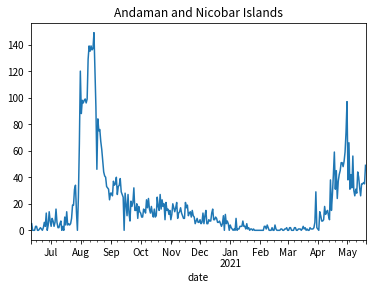

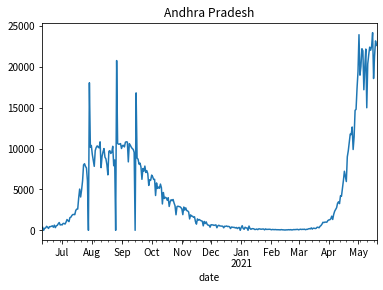

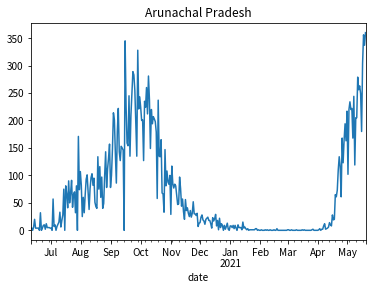

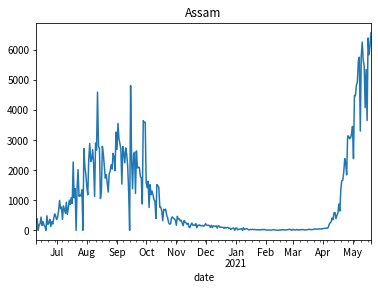

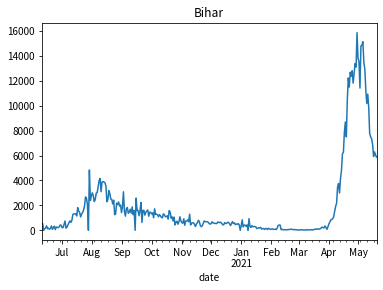

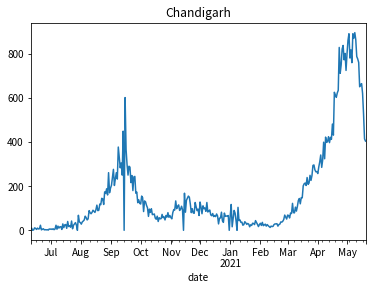

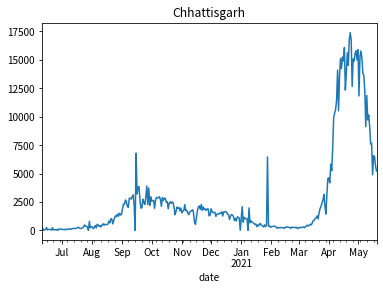

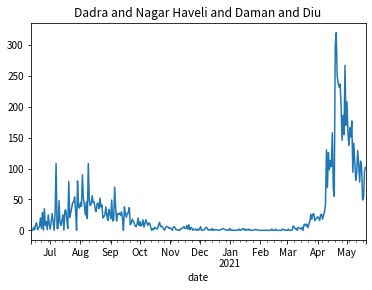

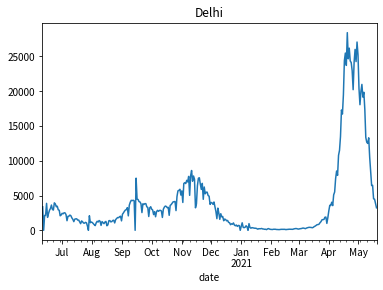

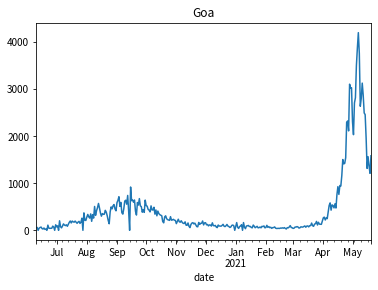

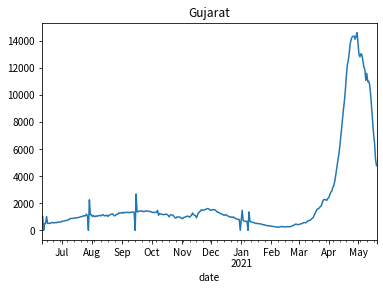

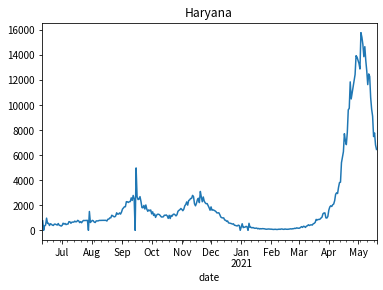

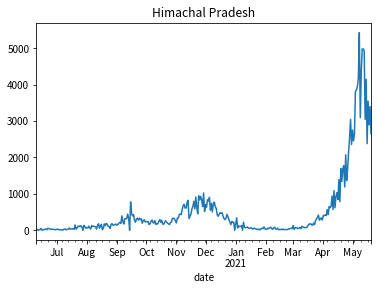

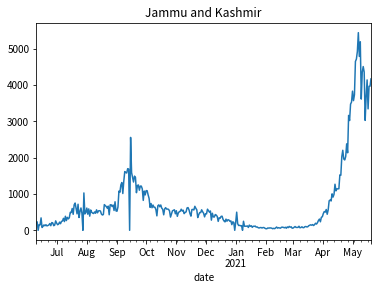

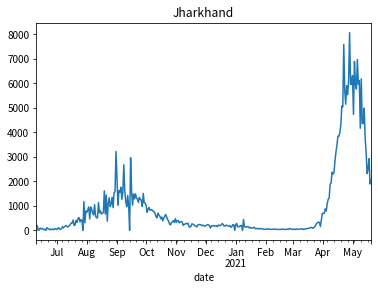

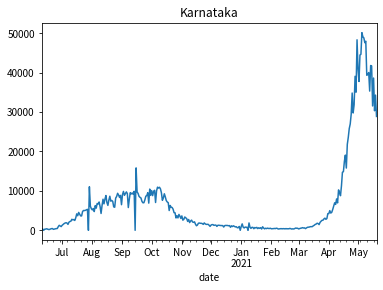

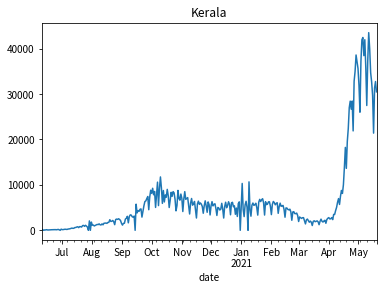

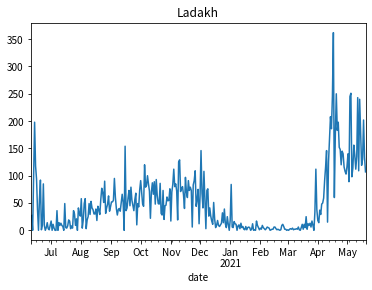

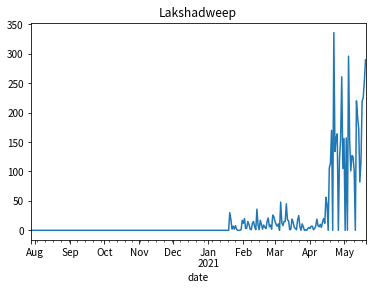

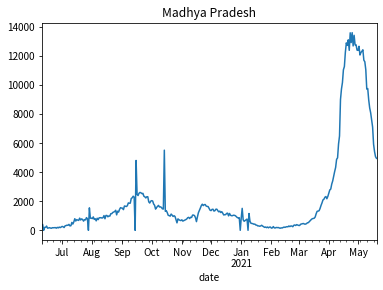

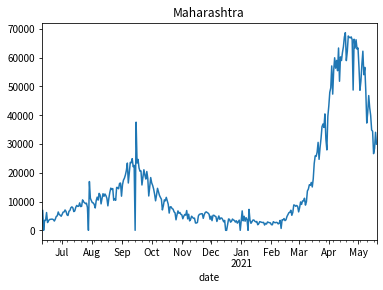

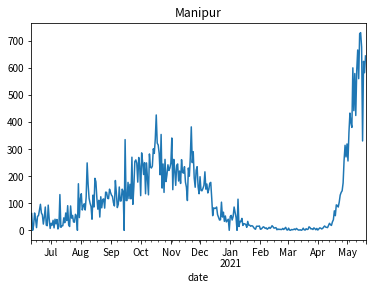

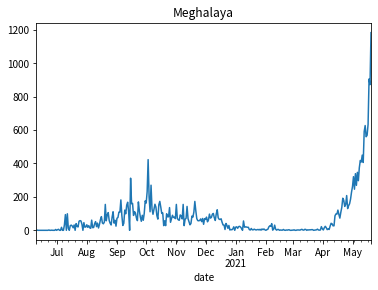

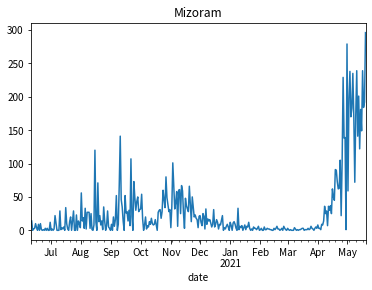

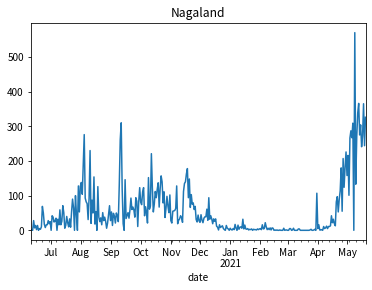

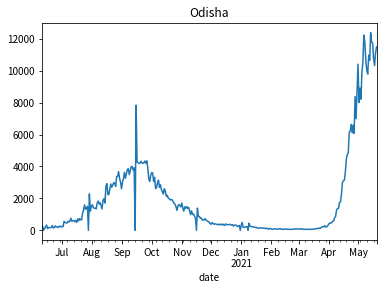

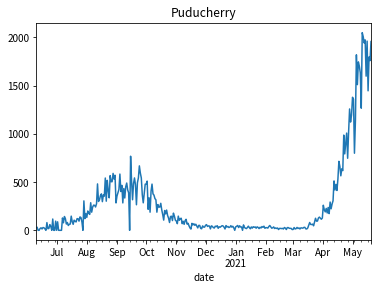

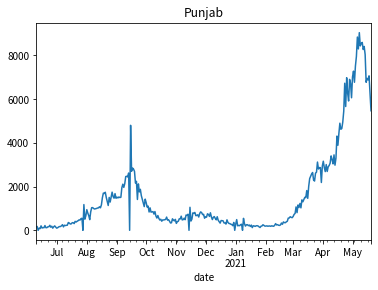

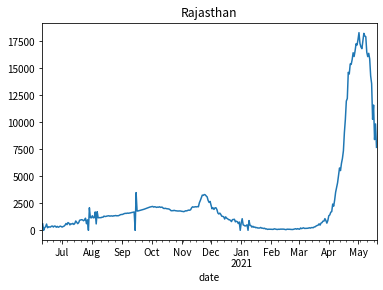

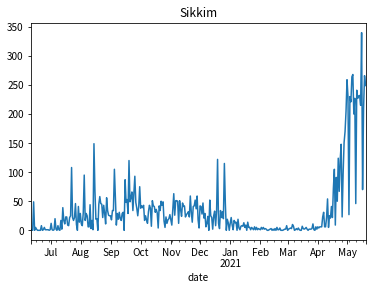

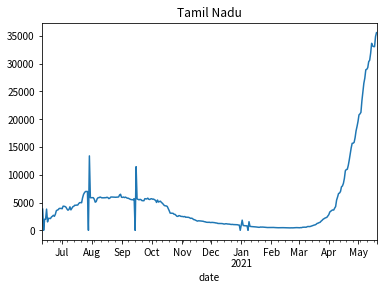

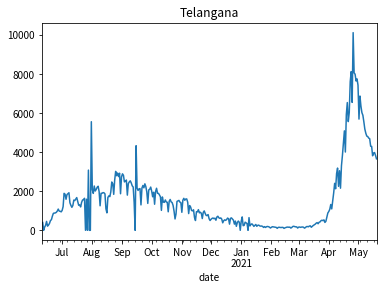

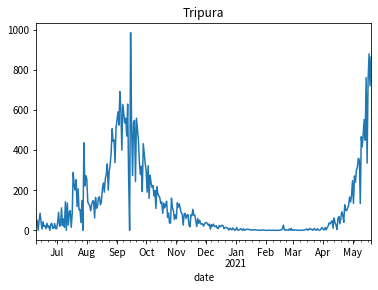

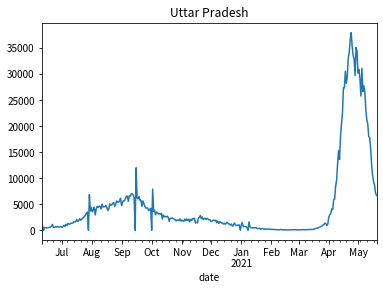

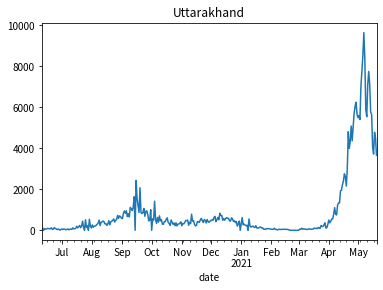

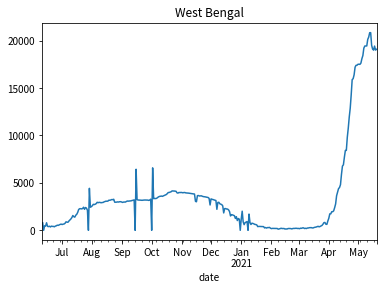

In [8]:
!mkdir -p india_trends/states

def extract_by_country(date, df):
    result = df.loc[df["Country_Region"] == "India"].copy()
    result["date"] = date
    return result 
c_data = pd.concat([extract_by_country(date, df) for date, df in tqdm(data.items())])
state_map = {}
for st, df in c_data.loc[c_data["Province_State"].notnull()].groupby("Province_State"):
    st_pop = populations.loc[populations["State Name"] == st]
    if st_pop.shape[0] >0:
        pop = pd.to_numeric(st_pop["Total Population(Projected 2020)"].values[0].replace(",",""))
        df.set_index("date", inplace=True)
        df["new_cases_per_million"] = (df["Confirmed"].diff() / pop * 10**6 )
        state_map[st] = df
    else:
        print("No population found for %s"%st)

for st, df in state_map.items():
        (df["Confirmed"].diff()).plot(y=["Confirmed"], title=st)
        plt.savefig("india_trends/states/%s.png"%st, facecolor="white")
        plt.show()
        plt.close()


In [11]:
new_cases_label = "new_cases_per_million"
freq = 7

def calc_monthly(df):
    df2=df.reset_index()
#    result = df2.groupby([df2["date"].dt.year, df2["date"].dt.month]).mean()
    result = df2.groupby(pd.Grouper(key="date", freq="%dd"%freq, base=df2.shape[0] % freq )).mean()
    return result

trends = {st: df["new_cases_per_million"] for st, df in state_map.items()}

def calc_trend_map(region, df):
    monthly = calc_monthly(df)
    return (region, 
     monthly[new_cases_label].values[-1])

trend_map = pd.DataFrame([calc_trend_map(region, df) for region, df in trends.items()],
                        columns=["State Names", new_cases_label]).set_index("State Names")

def calc_trends(df):
    monthly = calc_monthly(df)
    diff = monthly.diff()
    return (diff/monthly).fillna(0)

recents = pd.DataFrame([[p] + list(calc_trends(df).iloc[-1]) for p, df in trends.items()], columns=["State Names", "trend_new_cases"])
status = pd.merge(trend_map, recents, on="State Names")
status.set_index("State Names", inplace=True)

<ipython-input-11-16e8301cfa2d>:7: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  result = df2.groupby(pd.Grouper(key="date", freq="%dd"%freq, base=df2.shape[0] % freq )).mean()


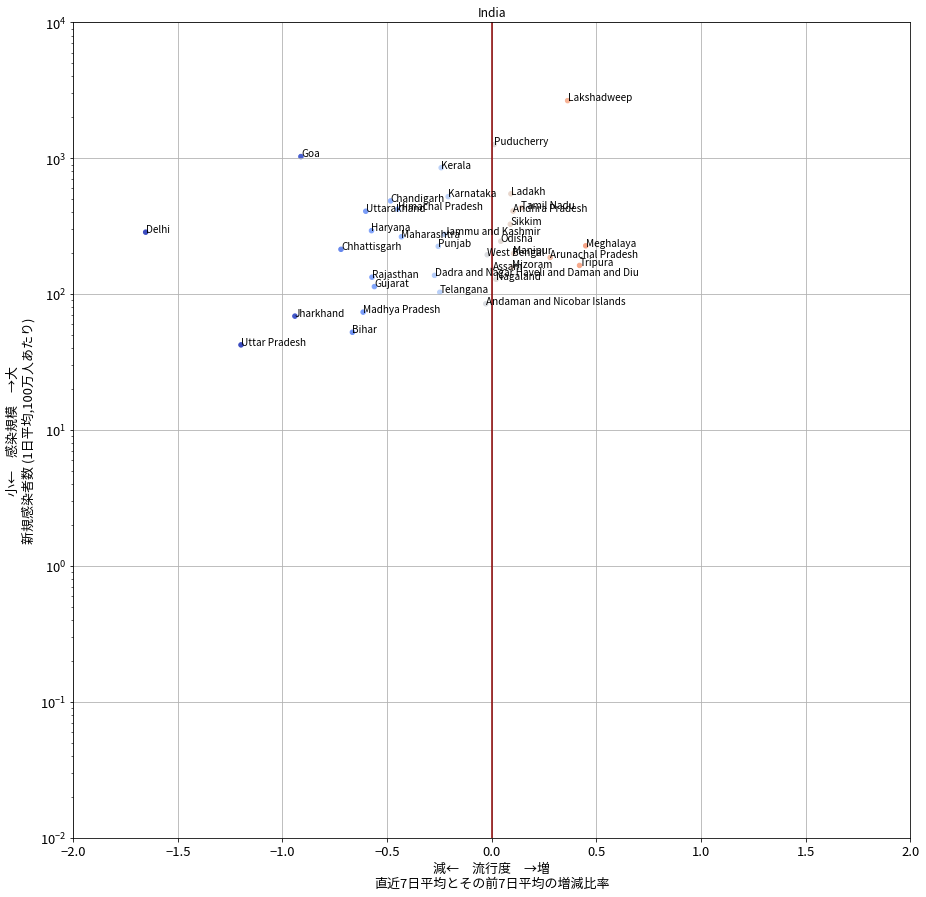

In [12]:
ymin=10**-2
ymax=10**4
xmin=-2
xmax=2

fig,ax=plt.subplots(figsize=(8, 8))

ax = ax
status.plot(ax=ax, kind="scatter", grid=True, 
        x="trend_new_cases", xlim=(xmin,xmax), 
        y=new_cases_label, logy=True, ylim=(ymin, ymax), 
        title="India",
        fontsize=13,
        legend=False,
        colorbar=False,
        c="trend_new_cases", colormap="coolwarm", vmin=-1, vmax=1, 
        figsize=(15,15))
ax.set_ylabel("小←　感染規模　→大\n新規感染者数 (1日平均,100万人あたり)", fontsize=13)
ax.set_xlabel("減←　流行度　→増\n直近{freq}日平均とその前{freq}日平均の増減比率".format(freq=freq), fontsize=13)
ax.vlines(0, ymin, ymax, linestyles="solid", color="darkred")
for i,r in status.iterrows():
    x = r["trend_new_cases"]
    y = r[new_cases_label]
    region = r.name
    if xmin <= x and x < xmax and ymin <= y and y < ymax:
        color = "black"
        fontweight = "normal"
        ax.annotate(region, xy=(x, y), color=color, fontweight = fontweight)
        
display(fig)
plt.savefig("india_trends/trend-india.png", facecolor="white")
plt.close()